**Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.**

In [63]:
#dataset:https://www.kaggle.com/gti-upm/leapgestrecog

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d gti-upm/leapgestrecog

 99% 2.11G/2.13G [00:22<00:00, 187MB/s]
100% 2.13G/2.13G [00:22<00:00, 103MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/leapgestrecog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import os
import cv2

In [12]:
categories = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "/content/leapGestRecog"

In [13]:
image_data=[]
for dr in os.listdir(data_path):
  for category in categories:
    class_index= categories.index(category)
    path= os.path.join(data_path,dr,category)
    for img in os.listdir(path):
      try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
      except Exception as e:
                pass
image_data[0]

[array([[5, 5, 5, ..., 3, 4, 2],
        [5, 4, 4, ..., 4, 4, 3],
        [5, 7, 5, ..., 5, 4, 4],
        ...,
        [4, 4, 5, ..., 3, 5, 3],
        [4, 4, 4, ..., 4, 5, 4],
        [4, 4, 4, ..., 3, 3, 4]], dtype=uint8),
 0]

In [15]:
import random
random.shuffle(image_data)

In [16]:
input_data=[]
label=[]
for X,y in image_data:
  input_data.append(X)
  label.append(y)

In [17]:
import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

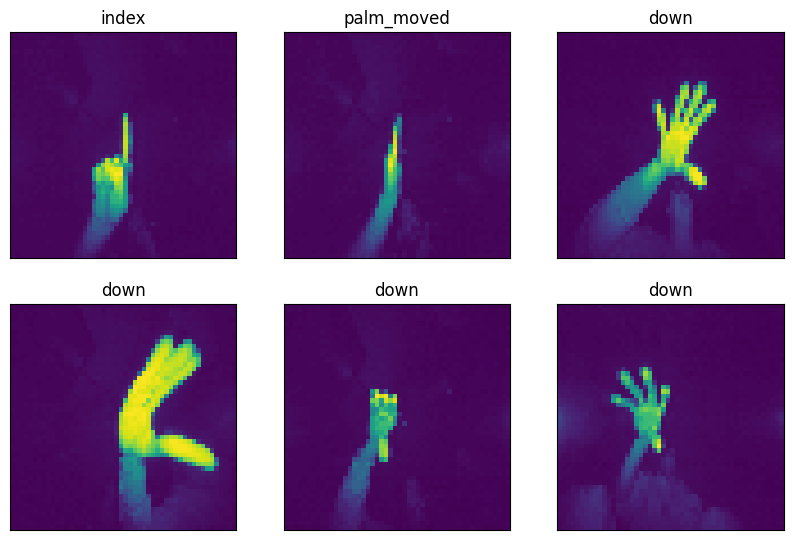

In [20]:
# ploting some of the images
plt.figure(1, figsize=(10,10))
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], )
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]][3:])
plt.show()

In [21]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [23]:
# reshaping the data
input_data.shape=(-1,50,50,1)

In [25]:
#spliting the input_data into test and train data
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test= train_test_split(input_data, label, test_size=0.3,random_state=0)

Modeling


In [27]:
model= keras.models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 67s 149ms/step - loss: 0.3895 - accuracy: 0.8719 - val_loss: 0.0185 - val_accuracy: 0.9960
Epoch 2/7
438/438 [==============================] - 66s 150ms/step - loss: 0.0216 - accuracy: 0.9926 - val_loss: 0.0094 - val_accuracy: 0.9977
Epoch 3/7
438/438 [==============================] - 65s 149ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 4/7
438/438 [==============================] - 70s 160ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.0060 - val_accuracy: 0.9992
Epoch 5/7
438/438 [==============================] - 66s 151ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 6/7
438/438 [==============================] - 65s 149ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0022 - val_accuracy: 0.9993
Epoch 7/7
438/438 [==============================] - 66s 150ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0039 - val_accuracy:

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_3 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 23, 23, 32)        0         
                                                      

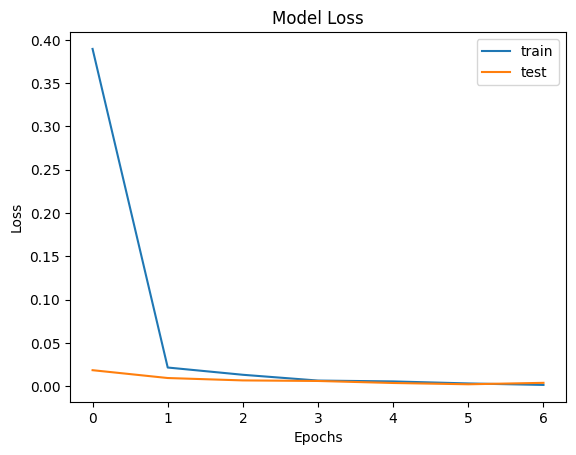

In [32]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

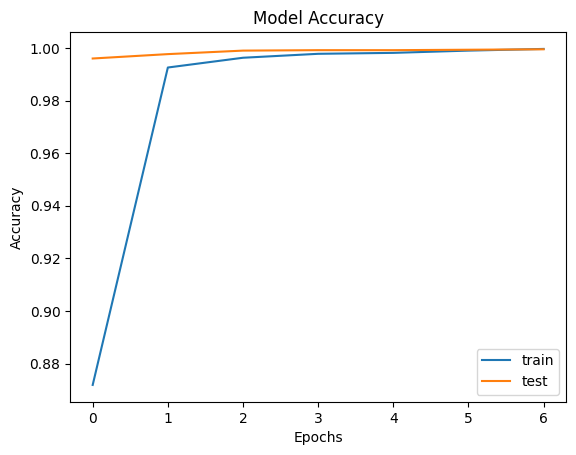

In [33]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [34]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 8s 43ms/step - loss: 0.0039 - accuracy: 0.9995
Test accuracy: 99.95%


188/188 [==============================] - 8s 45ms/step


[]

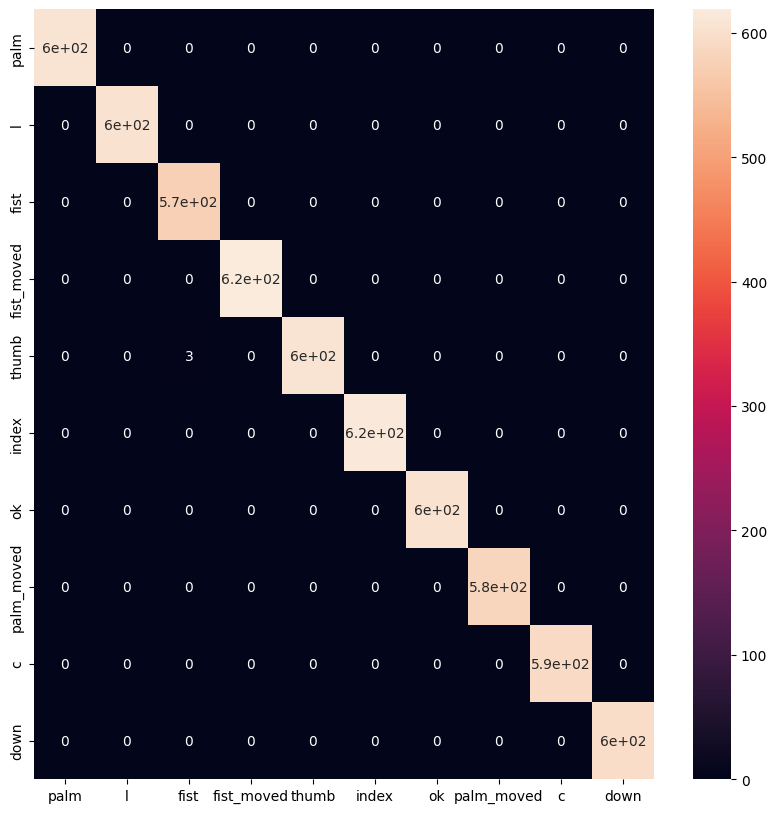

In [36]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in categories]
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

In [57]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(50, 50), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize pixel values to between 0 and 1
    img_array /= 255.0
    return img_array

In [55]:
def make_prediction(model, img_path):
    img_array = preprocess_image(img_path)
    print("image shape:",img_array.shape)
    prediction = model.predict(img_array)
    return prediction

In [59]:
categories = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
def decode_prediction(prediction):
    # Get the index of the predicted class
    predicted_class_index = np.argmax(prediction)
    # Get the corresponding class label from the categories list
    predicted_class = categories[predicted_class_index]
    return predicted_class


In [62]:
img_path='/content/leapGestRecog/09/01_palm/frame_09_01_0001.png'
prediction = make_prediction(model, img_path)
predicted_class = decode_prediction(prediction)
print("the prediction is: ",predicted_class[3:])

image shape: (1, 50, 50, 1)
1/1 [==============================] - 0s 19ms/step
the prediction is:  palm
